This dataset  has been taken from the link https://www.kaggle.com/openfoodfacts/world-food-facts.  

Open Food Facts is a free, open, collbarative database of food products from around the world, with ingredients, allergens, nutrition facts and all the tidbits of information we can find on product labels.

Open Food Facts is a non-profit association of volunteers. 5000+ contributors like you have added 100 000+ products from 150 countries using our Android, iPhone or Windows Phone app or their camera to scan barcodes and upload pictures of products and their labels.

### We will try to compare various characteristics of food from some countries

Importing the necessary packages

In [1]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

Lets read in the dataset

In [2]:
data = pd.read_csv('products.tsv',  sep='\t')

In [3]:
print ("The number of rows in the dataset is " + str(data.shape[0]))
print ("The number of columns in the dataset is " + str(data.shape[1]))

The number of rows in the dataset is 333824
The number of columns in the dataset is 162


In [4]:
data.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN


Lets set the options in such a way that all the rows and columns are displayed

In [5]:
# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
data.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ banan

In [7]:
# how much percentage of missing values are there
format(round(data.isnull().values.ravel().sum()/(data.shape[0] * data.shape[1]), 2))

'0.76'

In [8]:
# how many categorical and continuous features are there in the data
data.get_dtype_counts()

float64    106
object      56
dtype: int64

In [9]:
data.info() #it will also show the memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333824 entries, 0 to 333823
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 412.6+ MB


In [24]:
# Lets explore the countries features
countries_columns = ['countries','countries_tags','countries_en']

In [11]:
data[countries_columns].head()

,countries,countries_tags,countries_en
0,en:FR,en:france,France
1,US,en:united-states,United States
2,US,en:united-states,United States
3,US,en:united-states,United States
4,US,en:united-states,United States


We will convert the countries_en field into lower case so as to maintain uniformity

In [12]:
data['countries_en'] = data['countries_en'].str.lower()

In [13]:
data['countries_en'].head()

0           france
1    united states
2    united states
3    united states
4    united states
Name: countries_en, dtype: object

Lets see if the below approach can detect all the unique cells which contain united states

In [14]:
data.countries_en.str.extract(r"(united states.*)").unique()

array([nan, 'united states', 'united states,australie',
       'united states,pays-bas', 'united states,belgie,nederland',
       'united states,niederlande', 'united states,香港',
       'united states,virgin islands of the united states',
       'united states,scotland,south-wales,vienna',
       'united states,other-日本,日本', 'united states,szczecin',
       'united states,yemen', 'united states,nederland',
       'united states,казахстан'], dtype=object)

Yes the above approach would return all the rows containing united states

In [15]:
data['countries_en'].isnull().values.ravel().sum()

265

Lets remove the rows which contan NA values in countries_en variable of the dataset

In [16]:
data = data[data.countries_en.notnull()]
data['countries_en'].isnull().values.ravel().sum()

0

We will create a dict which will contain the dataframes of various countries which will primarily be United States, India, France, United Kingdom, Spain, Australia, Brazil

In [17]:
dataset= {}
dataset['us'] = data[data['countries_en'].str.contains("united states")]
dataset['india'] = data[data['countries_en'].str.contains("india")]
dataset['france'] = data[data['countries_en'].str.contains("france")]
dataset['uk'] = data[data['countries_en'].str.contains("united kingdom")]
dataset['spain'] = data[data['countries_en'].str.contains("spain")]
dataset['aus'] = data[data['countries_en'].str.contains("australia")]
dataset['brazil'] = data[data['countries_en'].str.contains("brazil")]

We will compare the mean values of energy_100g, fat_100g, cholesterol_100g, nutrition_score_fr_100g fro these seven countries listed above

In [18]:
country_food_info_values = []

In [19]:
for key in dataset.keys():
    country_food_info_values.append([key, 
                             round(dataset[key]['energy_100g'].mean(), 2),
                             round(dataset[key]['fat_100g'].mean(), 2),
                             round(dataset[key]['cholesterol_100g'].mean(), 2),
                             round(dataset[key]['nutrition-score-fr_100g'].mean(), 2)]
                            )

In [20]:
country_food_info_values

[['us', 1133.67, 12.41, 0.02, 9.44],
 ['india', 1089.48, 15.95, 0.01, 13.29],
 ['france', 1169.98, 13.38, 0.04, 8.75],
 ['uk', 1124.83, 13.98, 0.01, 8.22],
 ['spain', 1069.44, 13.21, 0.0, 6.12],
 ['aus', 1006.9, 11.44, 0.0, 8.46],
 ['brazil', 1274.44, 12.17, 0.01, 10.11]]

Lets convert the above array into a dataframe

In [21]:
country_food_info = pd.DataFrame(country_food_info_values, columns=['country','energy_100g', 'fat_100g', 'cholesterol_100g', 'nutrition_score_fr_100g'])

In [22]:
country_food_info

,country,energy_100g,fat_100g,cholesterol_100g,nutrition_score_fr_100g
0,us,1133.67,12.41,0.02,9.44
1,india,1089.48,15.95,0.01,13.29
2,france,1169.98,13.38,0.04,8.75
3,uk,1124.83,13.98,0.01,8.22
4,spain,1069.44,13.21,0.00,6.12
5,aus,1006.90,11.44,0.00,8.46
6,brazil,1274.44,12.17,0.01,10.11


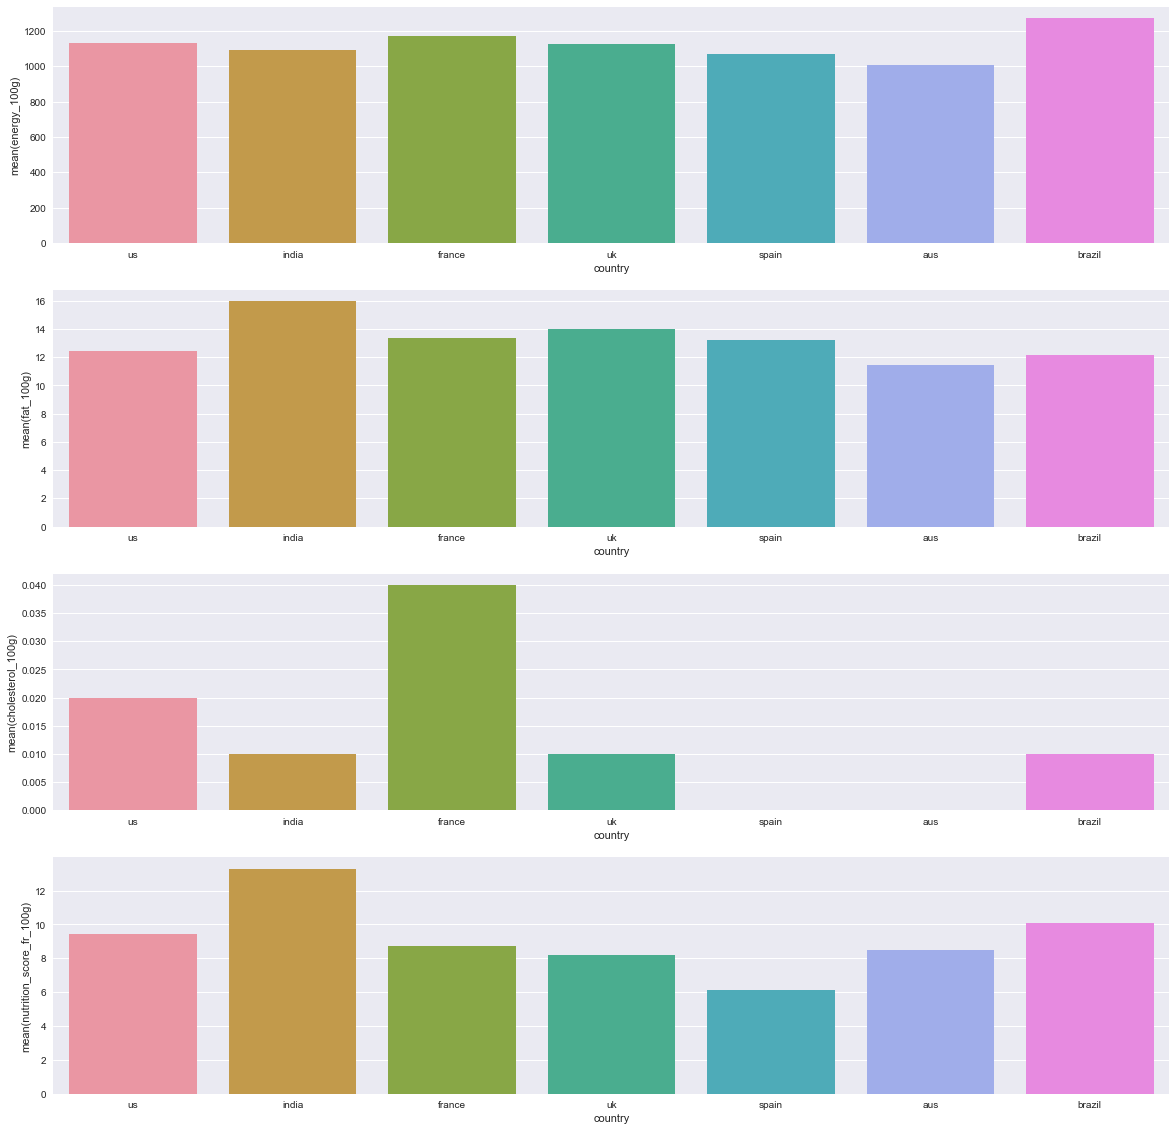

In [23]:
#Lets plot the meann values for the seven countries below
columns=['energy_100g', 'fat_100g', 'cholesterol_100g', 'nutrition_score_fr_100g']

fig, axis = plt.subplots(4,1,figsize=[20,20])

for i, col in enumerate(columns):
    sns.barplot(x= 'country', y = col, data = country_food_info, ax = axis[i])
                         

### More to come. Stay tuned